In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split


In [12]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
sample = pd.read_csv("sample_submission_8RXa3c6.csv")

In [32]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [13]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDA15,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,1,0,0,DRC01,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDN15,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,1,0,0,0,0,1,0,FDX07,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCD19,OUT013,994.7052


In [16]:
X = train.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"])
y = train['Item_Outlet_Sales']

In [17]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [18]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=32)

In [22]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [23]:
model.coef_

array([ 5.75271882e+00, -8.08003430e+00,  9.78764109e+02,  5.06812501e+13,
        3.56924554e+14,  3.56924554e+14,  4.53359695e+14,  4.53359695e+14,
        4.53359695e+14,  4.53359695e+14,  4.53359695e+14,  4.53359695e+14,
        4.53359695e+14,  4.53359695e+14, -2.09898896e+15, -2.09898896e+15,
        4.53359695e+14, -2.09898896e+15,  4.53359695e+14,  4.53359695e+14,
        4.53359695e+14,  4.53359695e+14, -3.34616724e+13,  1.17108015e+14,
       -1.07422797e+14,  1.23495669e+14, -9.53592580e+13,  2.77456828e+14,
       -1.25585149e+14, -1.37693383e+14, -5.90474981e+13,  7.66890108e+13,
        1.33378581e+14,  2.63252930e+14,  3.86881204e+14,  9.15673793e+13,
        2.00483851e+14,  1.08373317e+14, -5.43990952e+13, -1.80614486e+13,
       -2.11328725e+13, -3.20392845e+14, -3.42436227e+15, -3.42436227e+15,
       -8.72013619e+14])

In [24]:
model.intercept_

2207709344419342.0

In [27]:
train_X_pred = model.predict(train_X)
test_X_pred = model.predict(test_X)

#actual test data from hackathon
test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier"]))

In [28]:
train_X_RMSE = np.sqrt(mean_squared_error(train_y, train_X_pred))
test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_X_pred))

In [29]:
print("Train RMSE : ",train_X_RMSE)
print("Test RMSE : ",test_X_RMSE)

Train RMSE :  1125.2226933045113
Test RMSE :  1136.398236618232


In [30]:
train_X_R2 = r2_score(train_y, train_X_pred)
test_X_R2 = r2_score(test_y, test_X_pred)

In [31]:
print("Train R2 : ",train_X_R2)
print("Test R2 : ",test_X_R2)

Train R2 :  0.5643997270986956
Test R2 :  0.5594981851164198


In [42]:
test_pred_modified = np.where(test_pred<0,0,test_pred)

In [46]:
#test_pred_modified = np.abs(test_pred)

In [47]:
test['Item_Outlet_Sales'] = test_pred_modified

In [48]:
Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]

In [49]:
Output.to_csv("Result_Linear_Regression_with_80percent_traindata_abs.csv", index = False)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,1.710530,-1.134699,-0.533831,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-0.965996,-0.534917,-0.864708,-1.095319,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0.388391,0.653405,1.622763,-0.020226,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,-1.177753,-0.982657,0.225966,-1.095319,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0.173409,1.023121,1.501577,1.532686,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.493036,-1.019425,0.005000,0.099229,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,-1.116483,1.497142,0.453249,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5678,-0.600527,0.147226,-0.358558,-0.498045,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,0.538878,-1.281712,1.185747,-1.095319,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [69]:
def model_predict(model, train_X,train_y,test,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test['Item_Outlet_Sales'] = test_pred_modified
    Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)

In [70]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [71]:
model_predict(model, X,y,test,"Result_LR_fulltrain_model.csv")

Train RMSE :  1127.0350680139338
Train R2 :  0.5637721106827676


In [80]:
from tqdm import tqdm
res_rmse = []
for i in tqdm(range(1,50)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_X, train_y)
    test_pred = model.predict(test_X)
    test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_pred))
    res_rmse.append(test_X_RMSE)


100%|███████████████████████████████████████████| 49/49 [00:08<00:00,  5.65it/s]


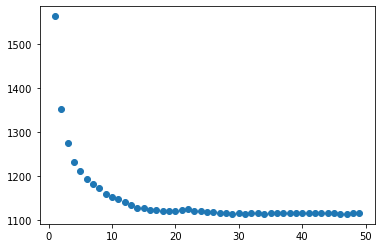

In [83]:
plt.scatter(range(1,50),res_rmse)

In [84]:
model = KNeighborsRegressor(n_neighbors=17)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=17)

In [85]:
model_predict(model, X,y,test,"Result_KNN_fulltrain_model.csv")

Train RMSE :  1069.6142399316077
Train R2 :  0.6070901457128928


In [87]:
from sklearn.preprocessing import PolynomialFeatures


In [101]:
poly= PolynomialFeatures(degree=3, include_bias=False)
poly_train_x = poly.fit_transform(X)
poly_test_x = poly.fit_transform(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))


In [102]:
def model_predict_poly(model, train_X,train_y,test,test_actual,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test)
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test_actual['Item_Outlet_Sales'] = test_pred_modified
    Output = test_actual[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)

In [103]:
model = LinearRegression()
model.fit(poly_train_x, y)
model_predict_poly(model, poly_train_x,y,poly_test_x,test,"Res_poly_fulltrain_degree_3.csv")

Train RMSE :  1010.1791687321435
Train R2 :  0.6495424778833616
